In [7]:
import pandas
from sklearn import tree
import graphviz
from IPython import display

data_frame = pandas.read_csv('attack_data.csv')

Load the csv file with the data.

In [8]:
print(data_frame)

     sky   air   humid    wind water forecast attack
0  sunny  warm  normal  strong  warm     same      +
1  sunny  warm    high  strong  warm     same      +
2  rainy  cold    high  strong  warm   change      -
3  sunny  warm    high  strong  cool   change      +
4  sunny  warm  normal    weak  warm     same      -


As shown here there is a lot of nominal categorical data.
We need to label them so our classifier can work with this data.

In [9]:
labeled_data_frame = data_frame.copy()

labeled_data_frame['sky'] = labeled_data_frame['sky'].map({'sunny': False, 'rainy': True})
labeled_data_frame['air'] = labeled_data_frame['air'].map({'warm': False, 'cold': True})
labeled_data_frame['humid'] = labeled_data_frame['humid'].map({'normal': False, 'high': True})
labeled_data_frame['wind'] = labeled_data_frame['wind'].map({'strong': False, 'weak': True})
labeled_data_frame['water'] = labeled_data_frame['water'].map({'warm': False, 'cool': True})
labeled_data_frame['forecast'] = labeled_data_frame['forecast'].map({'same': False, 'change': True})

print(labeled_data_frame)

     sky    air  humid   wind  water  forecast attack
0  False  False  False  False  False     False      +
1  False  False   True  False  False     False      +
2   True   True   True  False  False      True      -
3  False  False   True  False   True      True      +
4  False  False  False   True  False     False      -


We labeled the feature values of the datas with boolean values.

In [10]:
X = labeled_data_frame.drop('attack', axis=1)
y = labeled_data_frame['attack']

print(X)
print()
print(y)

     sky    air  humid   wind  water  forecast
0  False  False  False  False  False     False
1  False  False   True  False  False     False
2   True   True   True  False  False      True
3  False  False   True  False   True      True
4  False  False  False   True  False     False

0    +
1    +
2    -
3    +
4    -
Name: attack, dtype: object


We split the DataFrame into `X` and `y`. `X` represents the training input samples,
while `y` represents the target values.

In [11]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Here we define our [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).
Then we fit the classifier with the input samples and the target values defined earlier.

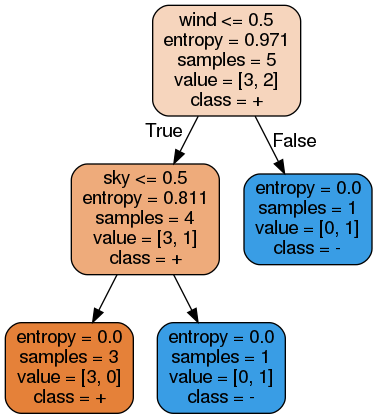

In [12]:
dot_data = tree.export_graphviz(decision_tree=decision_tree,
                                filled=True,
                                rounded=True,
                                feature_names=X.columns,
                                class_names=decision_tree.classes_)

graph = graphviz.Source(dot_data)

display.Image(graph.pipe(format='png'))


We use [export_graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) to visualize
the newly learned decision tree. By running this notebook another time it's clear that there are more possible trees which
could represent the given data.

The labels we defined sadly removed the values of the features, such as *sunny*, *rainy* and so on.
This means we need the earlier two DataFrames to come to an conclusion wether to attack + or -.

The leaf-nodes tell us in the class-section wether to attack + or -.